In [19]:
%pip install tensorflow
%pip install matplotlib
%pip install pandas numpy
%pip install opencv-python
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Personal Documents\Mtech\semester 4\Project\JupyterCode\virtual\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Personal Documents\Mtech\semester 4\Project\JupyterCode\virtual\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Personal Documents\Mtech\semester 4\Project\JupyterCode\virtual\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Personal Documents\Mtech\semester 4\Project\JupyterCode\virtual\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Personal Documents\Mtech\semester 4\Project\JupyterCode\virtual\Scripts\python.exe -m pip install --upgrade pip' command.


In [20]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [21]:
# imports

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from matplotlib.pyplot import imshow
import sys, os
from glob import glob
from os import walk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, UpSampling2D, concatenate, MaxPooling2D, Conv2DTranspose, Concatenate, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
import cv2

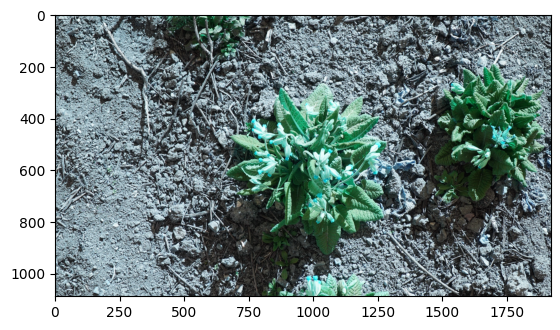

In [22]:
imshow(cv2.imread('../Data/CropAndWeed/images/ave-0035-0004.jpg'))

In [23]:
data = {}
DATASET_PATH = '../Data/CropAndWeed/'

for (dirpath, dirnames, filenames) in walk('..\Data\CropAndWeed\images'):
    for filename in filenames:
        f_name = filename.split('.')[0]
        if(data.get(f_name)):
            data[f_name]['image_path'] = os.path.join(os.path.normpath(dirpath), filename)
        else:
             data[f_name] = {'image_path': os.path.join(os.path.normpath(dirpath), filename)}

for (dirpath, dirnames, filenames) in walk('..\Data\CropAndWeed\\bboxes'):
    for filename in filenames:
        f_name = filename.split('.')[0]
        if(data.get(f_name)):
            data[f_name]['bboxes_path'] = os.path.join(os.path.normpath(dirpath), filename)
        else:
             data[f_name] = {'bboxes_path': os.path.join(os.path.normpath(dirpath), filename)}


for (dirpath, dirnames, filenames) in walk('..\Data\CropAndWeed\labelIds\CropAndWeed'):
    for filename in filenames:
        f_name = filename.split('.')[0]
        if(data.get(f_name)):
            data[f_name]['labelIds_path'] = os.path.join(os.path.normpath(dirpath), filename)
        else:
             data[f_name] = {'labelIds_path': os.path.join(os.path.normpath(dirpath), filename)}

for (dirpath, dirnames, filenames) in walk('..\Data\CropAndWeed\params'):
    for filename in filenames:
        f_name = filename.split('.')[0]
        if(data.get(f_name)):
            data[f_name]['params_path'] = os.path.join(os.path.normpath(dirpath), filename)
        else:
             data[f_name] = {'params_path': os.path.join(os.path.normpath(dirpath), filename)}

print(data['ave-0000-0001'])

{'image_path': '..\\Data\\CropAndWeed\\images\\ave-0000-0001.jpg', 'bboxes_path': '..\\Data\\CropAndWeed\\bboxes\\ave-0000-0001.csv', 'labelIds_path': '..\\Data\\CropAndWeed\\labelIds\\CropAndWeed\\ave-0000-0001.png', 'params_path': '..\\Data\\CropAndWeed\\params\\ave-0000-0001.csv'}


In [24]:
label_data = {
    0: ('Soil', (0, 0, 0)),
    1: ('Maize', (255, 0, 0)),
    2: ('Maize two-leaf stage', (234, 0, 0)),
    3: ('Maize four-leaf stage', (212, 0, 0)),
    4: ('Maize six-leaf stage', (191, 0, 0)),
    5: ('Maize eight-leaf stage', (170, 0, 0)),
    6: ('Maize max', (149, 0, 0)),
    7: ('Sugar beet', (255, 85, 0)),
    8: ('Sugar beet two-leaf stage', (234, 78, 0)),
    9: ('Sugar beet four-leaf stage', (212, 71, 0)),
    10: ('Sugar beet six-leaf stage', (191, 64, 0)),
    11: ('Sugar beet eight-leaf stage', (170, 57, 0)),
    12: ('Sugar beet Max', (149, 50, 0)),
    13: ('Pea', (255, 170, 0)),
    14: ('Courgette', (255, 255, 0)),
    15: ('Pumpkins', (170, 255, 0)),
    16: ('Radish', (85, 255, 0)),
    17: ('Asparagus', (0, 255, 0)),
    18: ('Potato', (0, 255, 85)),
    19: ('Flat leaf parsley', (0, 255, 170)),
    20: ('Curly leaf parsley', (0, 255, 255)),
    21: ('Cowslip', (0, 170, 255)),
    22: ('Poppy', (0, 85, 255)),
    23: ('Hemp', (0, 0, 255)),
    24: ('Sunflower', (85, 0, 255)),
    25: ('Sage', (170, 0, 255)),
    26: ('Common bean', (255, 0, 255)),
    27: ('Faba bean', (255, 0, 170)),
    28: ('Clover', (255, 0, 85)),
    29: ('Hybrid goosefoot', (255, 188, 178)),
    30: ('Black-bindweed', (255, 207, 178)),
    31: ('Cockspur grass', (255, 226, 178)),
    32: ('Red-root amaranth', (255, 245, 178)),
    33: ('White goosefoot', (245, 255, 178)),
    34: ('Thorn apple', (226, 255, 178)),
    35: ('Potato weed', (207, 255, 178)),
    36: ('German chamomile', (188, 255, 178)),
    37: ('Saltbush', (178, 255, 188)),
    38: ('Creeping thistle', (178, 255, 207)),
    39: ('Field milk thistle', (178, 255, 226)),
    40: ('Purslane', (178, 255, 245)),
    41: ('Black nightshade', (178, 245, 255)),
    42: ('Mercuries', (178, 226, 255)),
    43: ('Spurge', (178, 207, 255)),
    44: ('Pale persicaria', (178, 188, 255)),
    45: ('Geraniums', (188, 178, 255)),
    46: ('Cleavers', (207, 178, 255)),
    47: ('Whitetop', (226, 178, 255)),
    48: ('Meadow-grass', (245, 178, 255)),
    49: ('Frosted orach', (255, 178, 245)),
    50: ('Black horehound', (255, 178, 226)),
    51: ('Shepherds purse', (255, 178, 207)),
    52: ('Field bindweed', (255, 178, 188)),
    53: ('Common mugwort', (255, 194, 178)),
    54: ('Hedge mustard', (255, 213, 178)),
    55: ('Groundsel', (255, 219, 178)),
    56: ('Speedwell', (255, 232, 178)),
    57: ('Broadleaf plantain', (255, 238, 178)),
    58: ('White ball-mustard', (255, 251, 178)),
    59: ('Peppermint', (255, 212, 0)),
    60: ('Field pennycress', (239, 255, 178)),
    61: ('Corn spurry', (233, 255, 178)),
    62: ('Purple crabgrass', (220, 255, 178)),
    63: ('Common fumitory', (214, 255, 178)),
    64: ('Ivy-leaved speedwell', (201, 255, 178)),
    65: ('Annual meadow grass', (195, 255, 178)),
    66: ('Redshank', (182, 255, 178)),
    67: ('Common hemp-nettle', (178, 255, 194)),
    68: ('Rough meadow-grass', (178, 255, 200)),
    69: ('Green bristlegrass', (178, 255, 213)),
    70: ('Small geranium', (178, 255, 220)),
    71: ('Cornflower', (178, 255, 232)),
    72: ('Common corn-cockle', (178, 255, 238)),
    73: ('Creeping crowfoot', (178, 255, 251)),
    74: ('Wall barley', (178, 239, 255)),
    75: ('Annual fescue', (178, 233, 255)),
    76: ('Purple dead-nettle', (178, 220, 255)),
    77: ('Ribwort plantain', (178, 214, 255)),
    78: ('Pineappleweed', (178, 201, 255)),
    79: ('Common chickweed', (178, 195, 255)),
    80: ('Hedge mustard', (178, 182, 255)),
    81: ('Soft brome', (194, 178, 255)),
    82: ('Wild pansy', (200, 178, 255)),
    83: ('Yellow rocket', (213, 178, 255)),
    84: ('Common wild oat', (219, 178, 255)),
    85: ('Red poppy', (232, 178, 255)),
    86: ('Rye brome', (238, 178, 255)),
    87: ('Knotgrass', (251, 178, 255)),
    88: ('Prickly lettuce', (255, 178, 239)),
    89: ('Copse-bindweed', (255, 178, 233)),
    90: ('Manyseeds', (255, 178, 220)),
    91: ('Common buckwheat', (255, 178, 214)),
    92: ('Chives', (212, 255, 0)),
    93: ('Garlic', (127, 255, 0)),
    94: ('Soybean', (42, 255, 0)),
    95: ('Wild carrot', (244, 255, 0)),
    96: ('Field mustard', (159, 255, 0)),
    97: ('Giant fennel', (74, 255, 0)),
    98: ('Common horsetail', (10, 255, 0)),
    99: ('Common dandelion', (202, 255, 0)),
    255: ('Vegetation', (128, 128, 128))}


# sample = data['ave-0032-0006']

# print('sample', sample)

# import pandas as pd
# import cv2
# visualizations_dir = '.\VIZUAL'
# # image = cv2.imread(sample['image_path'])
# # path = os.path.join(visualizations_dir, f"_v.jpg")
# # print(os.path.normpath(path))


# # bb_data = pd.read_csv(sample['bboxes_path'], header=None)
# # color = (255,255,255)

# # for i, row in bb_data.iterrows():
# #     left = row[0]
# #     top = row[1]
# #     right = row[2]
# #     bottom = row[3]
# #     label = row[4]

# #     label_name = label_data.get(label)

# #     cv2.rectangle(image, (int(row[0]), int(row[1])),
# #                   (int(row[2]), int(row[3])), color, thickness=2)
# #     cv2.circle(image, (int(row[5]), int(row[6])), 15, color, thickness=2)


# # cv2.imwrite(os.path.normpath(path), image)


In [25]:
def process_image():
    image_size = (512,512)
    i = 0
    for key in data:
        i +=1
        if i < 500:
            img = cv2.imread(data[key]['image_path'])
            mask = cv2.imread(data[key]['labelIds_path'])

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (image_size[1], image_size[0]))           
            img = img.astype('float32') / 255.0

            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)  # Ensure mask is in RGB format
            mask = cv2.resize(mask, (image_size[1], image_size[0]))   
            mask = mask.astype('float32') / 255.0  # Normalize to 0-1

            box_path = data[key]['bboxes_path']

            try:
                box_df = pd.read_csv(box_path, header=None)
                # print('Yielding image :', data[key]['image_path'])
                yield img, box_df, mask
            except Exception as e:
                print("Empty file", e)        


In [8]:
# Normalize pixels
images = []
masks = []

for img_, box_df, mask in process_image():
    images.append(img_)
    masks.append(mask)


print(len(images), len(masks))

images = np.array(images)
masks = np.array(masks)
# Test Train Split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, masks, test_size=0.33, random_state=42)


Empty file No columns to parse from file
Empty file No columns to parse from file
497 497


In [9]:
print(x_train.shape, y_train.shape)

(332, 512, 512, 3) (332, 512, 512, 3)


In [30]:
def build_unet_multi_channel():
    i = Input(shape=x_train[0].shape)
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_tensor=i)
    base_model.trainable = False  # Freeze the base model

    # Define the layers to use from the MobileNetV2
    layer_names = [
    'block_1_expand_relu', 
    'block_3_expand_relu', 
    'block_6_expand_relu', 
    'block_13_expand_relu', 
    'out_relu'
    ]

    # Get the outputs of the specified layers
    layers_outputs = [base_model.get_layer(name).output for name in layer_names]
    down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers_outputs)

    # Define the upsampling layers
    up_stack = [
    Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same'),
    Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same'),
    Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same'),
    Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same'),
    ]

    # Downsampling and upsampling path
    x = down_stack(base_model.input)

    # Start with the last layer output from the down stack
    x = x[-1]

    # Loop through the upsampling layers
    for i, up in enumerate(up_stack):
        x = up(x)

    # Concatenate with the corresponding downsampling output
    if i < len(layer_names) - 1:  # Ensure we don't go out of index
        x = Concatenate()([x, down_stack.layers[i].output])

    # Final layer to produce the output
    x = Conv2DTranspose(3, (3, 3), strides=(2, 2), padding='same')(x)  # Assuming 3 output channels
    outputs = Activation('softmax')(x)  # Softmax activation for multi-class segmentation

    return tf.keras.Model(inputs=base_model.input, outputs=outputs)

In [31]:
# i = Input(shape=x_train[0].shape)

# mobileNet = MobileNetV2(weights='imagenet', input_tensor=i)
# mnOp = mobileNet.get_layer('block_13_expand_relu').output

# conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(mnOp)
# conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
# pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

# conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
# conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
# pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

#     # Bottleneck
# conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
# conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)

#     # Decoder
# up1 = UpSampling2D(size=(2, 2))(mnOp)
# concat1 = concatenate([up1, conv2], axis=-1)
# conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(concat1)
# conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)

# up2 = UpSampling2D(size=(2, 2))(conv4)
# concat2 = concatenate([up2, conv1], axis=-1)
# conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat2)
# conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5)
# outputs = Conv2D(1, (1, 1), activation='softmax')(conv5)

# model = Model(i, outputs)


In [32]:
model = build_unet_multi_channel()

C:\Users\ub61555\AppData\Local\Temp\ipykernel_26524\1291333955.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=x_train[0].shape, include_top=False, weights='imagenet')


In [33]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_2        │ [(None, 256, 256, │  2,257,984 │ input_layer_5[0]… │
│ (Functional)        │ 96), (None, 128,  │            │                   │
│                     │ 128, 144), (None, │            │                   │
│                     │ 64, 64, 192),     │            │                   │
│                     │ (None, 32, 32,    │            │                   │
│                     │ 576), (None, 16,  │            │                   │
│                     │ 16, 1280)]        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_5  │ (None, 32, 32,    │  5,898,752 │ functional_2[0][… │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_6  │ (None, 64, 64,    │  1,179,904 │ conv2d_transpose… │
│ (Conv2DTranspose)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 256, 256,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_7  │ (None, 128, 128,  │    295,040 │ conv2d_transpose… │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 256, 256,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_8  │ (None, 256, 256,  │     73,792 │ conv2d_transpose… │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 256, 256,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 256, 256,  │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 96)               │            │ Conv1_relu[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_9  │ (None, 512, 512,  │      2,595 │ concatenate_2[0]… │
│ (Conv2DTranspose)   │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 512, 512,  │          0 │ conv2d_transpose… │
│ (Activation)        │ 3)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,708,067 (37.03 MB)

 Trainable params: 7,450,083 (28.42 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [38]:

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.MeanIoU(num_classes=3)])

r = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=4)

Epoch 1/4
11/11 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - loss: 33.4809 - mean_io_u_3: 0.3403 - val_loss: 134.4568 - val_mean_io_u_3: 0.3349
Epoch 2/4
11/11 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - loss: 192.5720 - mean_io_u_3: 0.3346 - val_loss: 602.8679 - val_mean_io_u_3: 0.3338
Epoch 3/4
11/11 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - loss: 780.7159 - mean_io_u_3: 0.3340 - val_loss: 2194.0327 - val_mean_io_u_3: 0.3336
Epoch 4/4
11/11 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - loss: 2638.9429 - mean_io_u_3: 0.3336 - val_loss: 6599.1445 - val_mean_io_u_3: 0.3336


In [15]:
plt.plot(r.history['mae'], label='mae')
plt.plot(r.history['val_mae'], label='val_mae')
plt.legend()

KeyError: 'mae'

In [39]:
pred= model.predict(x_val)
# predicted_masks = np.argmax(pred, axis=-1) 

6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


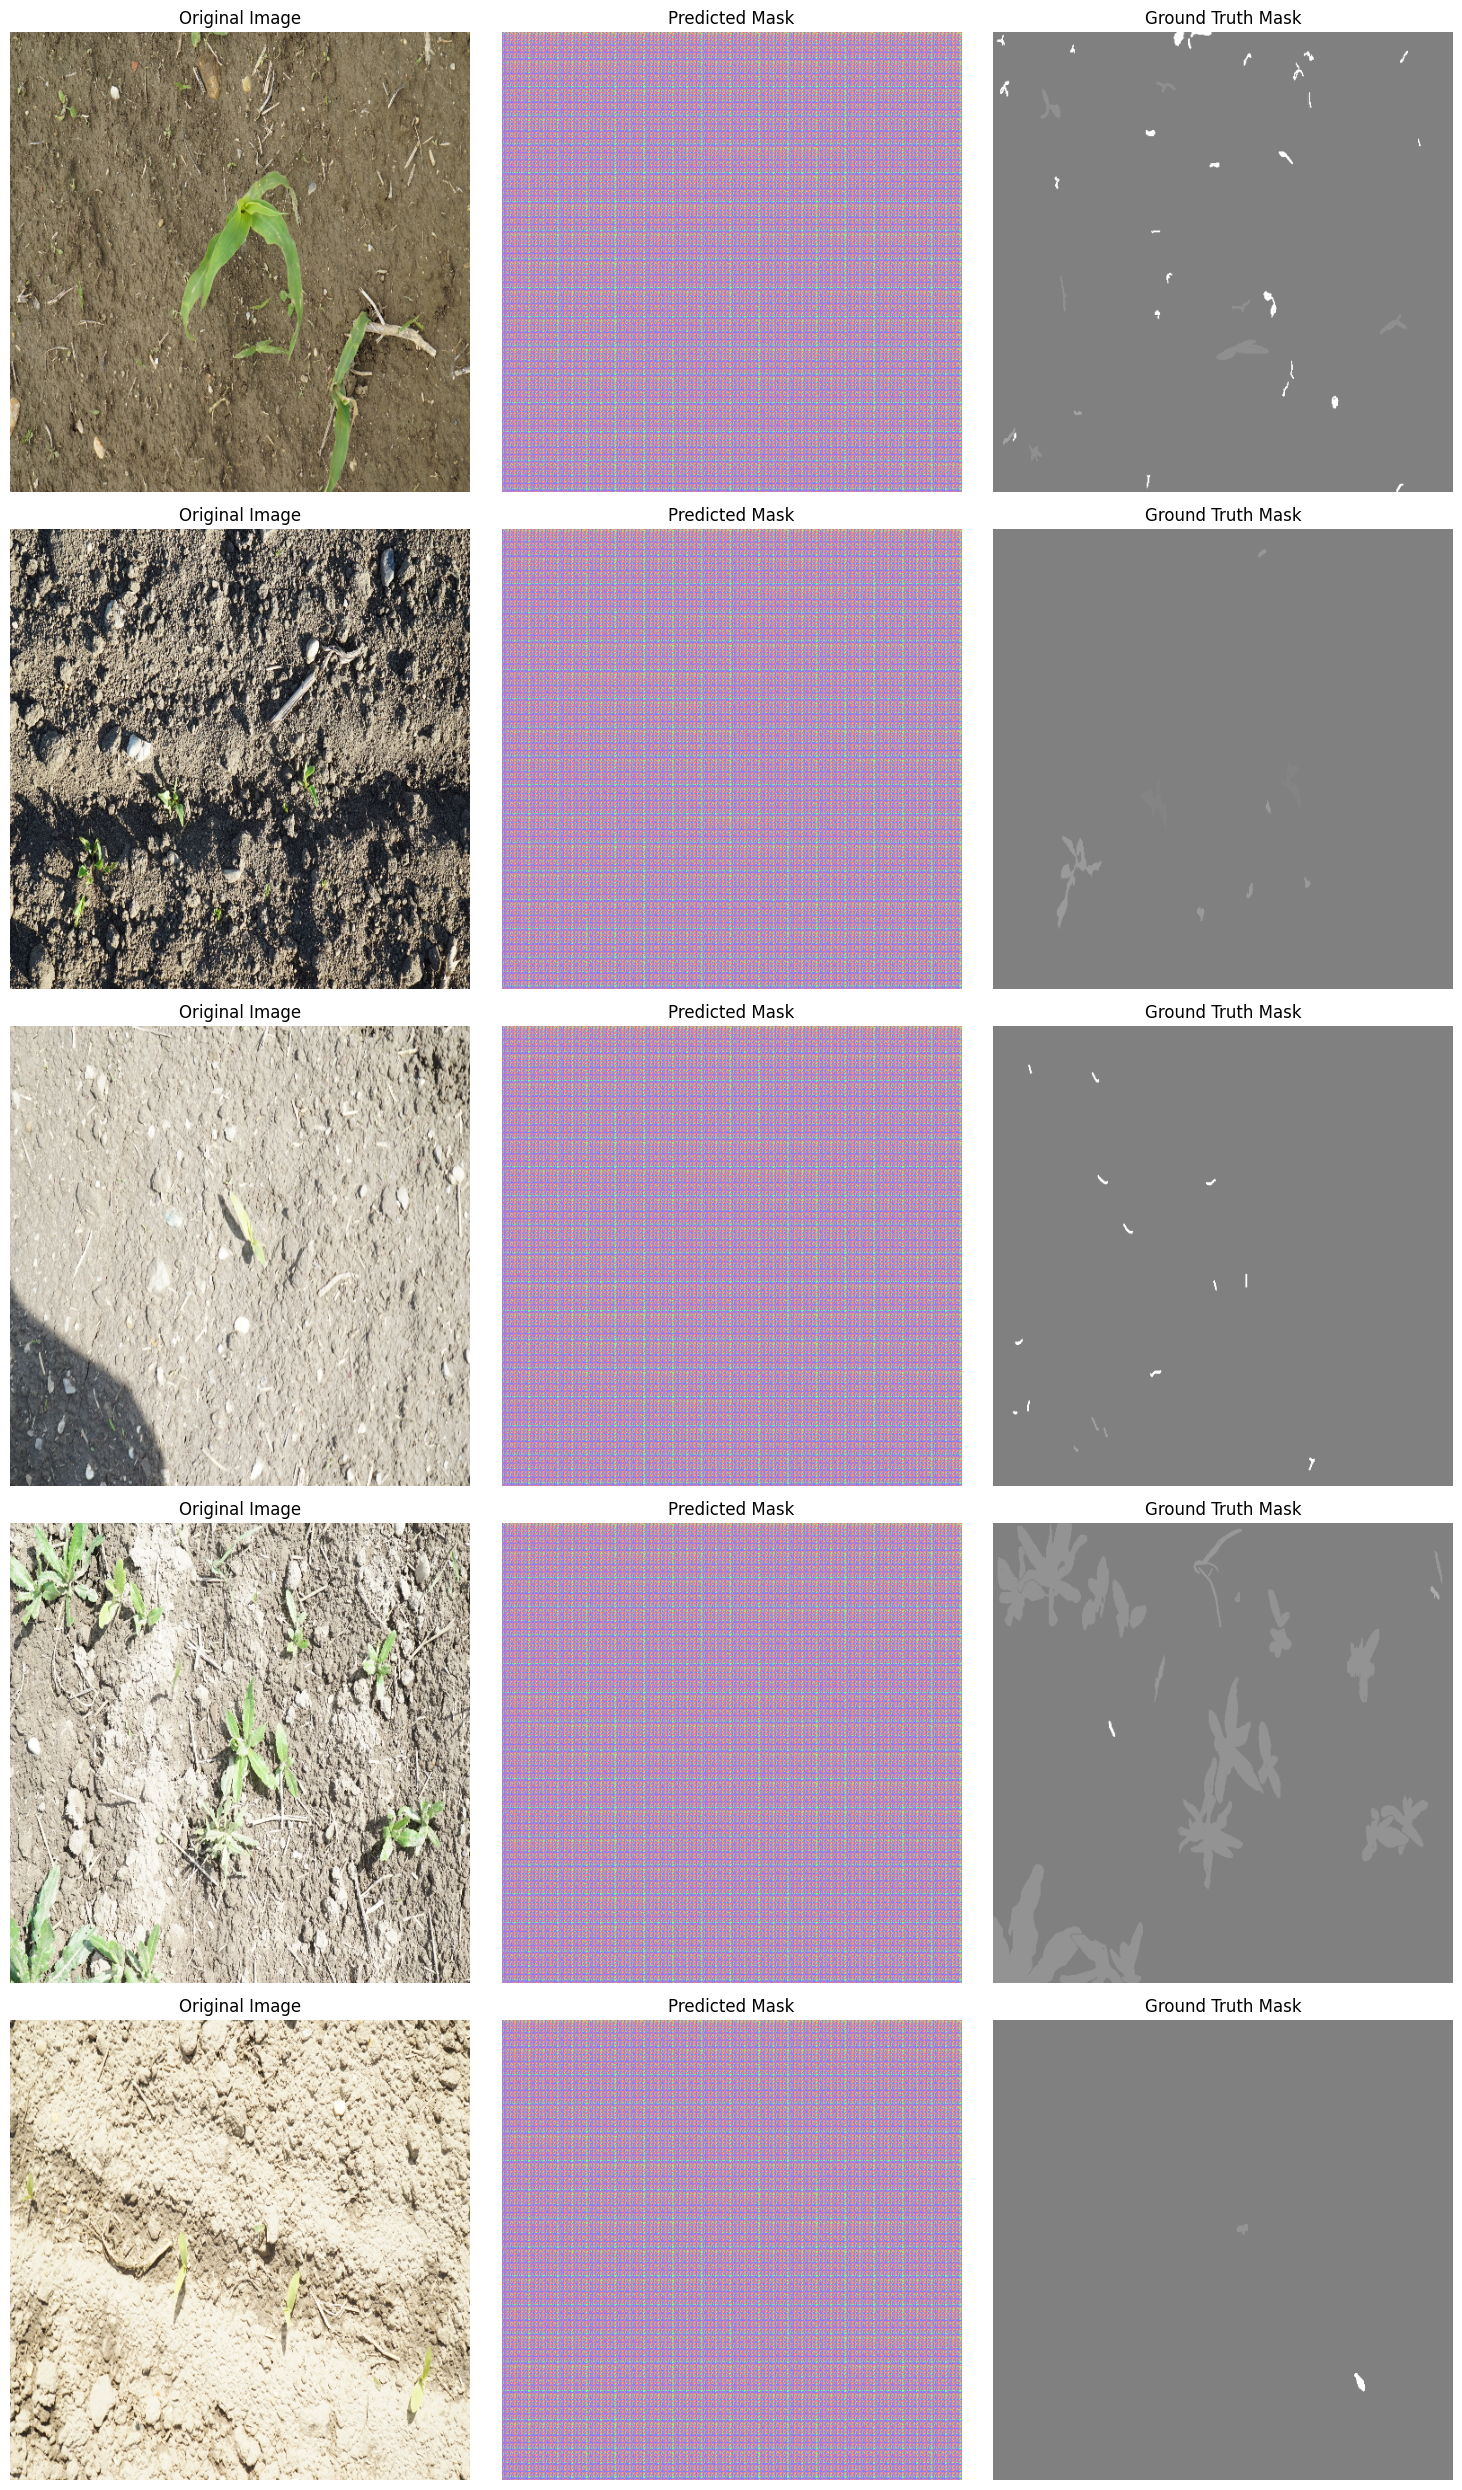

In [41]:
import matplotlib.pyplot as plt

def visualize_predictions(x_test, predicted_masks, ground_truth_masks=None, num_images=5):
    plt.figure(figsize=(15, 5 * num_images))
    for i in range(num_images):
        # Original image
        plt.subplot(num_images, 3, i * 3 + 1)
        plt.imshow(x_test[i])
        plt.title("Original Image")
        plt.axis("off")

        # Predicted mask
        plt.subplot(num_images, 3, i * 3 + 2)
        plt.imshow(predicted_masks[i], cmap='jet', alpha=0.5)  # Use colormap for better visualization
        plt.title("Predicted Mask")
        plt.axis("off")

        if ground_truth_masks is not None:
            # Ground truth mask
            plt.subplot(num_images, 3, i * 3 + 3)
            plt.imshow(ground_truth_masks[i], cmap='jet', alpha=0.5)  # Use colormap for better visualization
            plt.title("Ground Truth Mask")
            plt.axis("off")

    plt.tight_layout()
    plt.show()

# Call the visualization function
# If you have ground truth masks, pass them as well
visualize_predictions(x_val, pred, y_val)

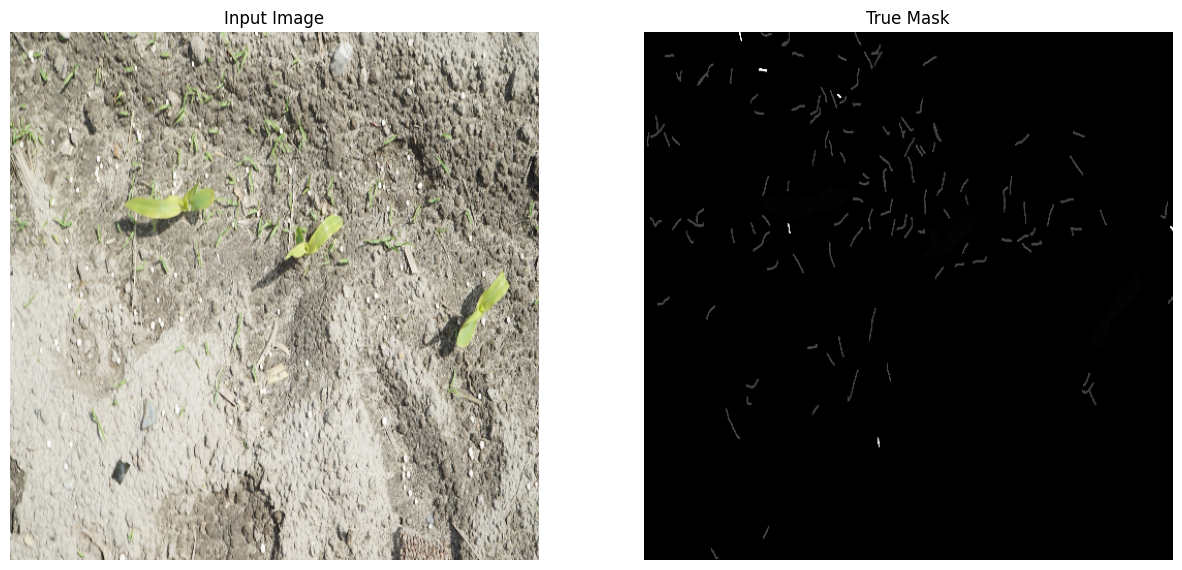

In [37]:
#Visualize
def display(display_list):
 plt.figure(figsize=(15, 15))
 title = ["Input Image", "True Mask", "Predicted Mask"]
 for i in range(len(display_list)):
   plt.subplot(1, len(display_list), i+1)
   plt.title(title[i])
   plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
   plt.axis("off")
 plt.show()

random_index = np.random.choice(len(x_train))
sample_image, sample_mask = x_train[random_index], y_train[random_index]
display([sample_image, sample_mask])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[[[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]

  [[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]

  [[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]

  ...

  [[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]

  [[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]

  [[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]]]


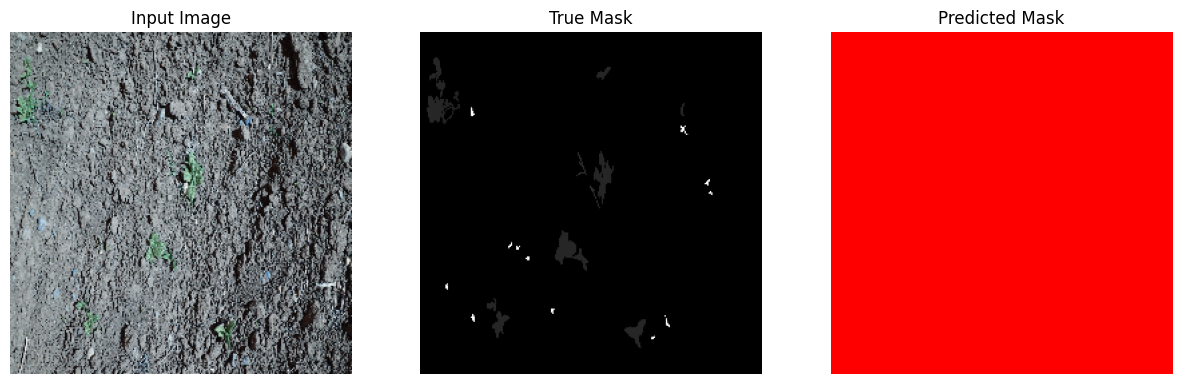

In [96]:
index = 675

x = np.expand_dims(images[index], axis=0)
pred_mask = model.predict(x)
print(pred_mask.astype('uint8')*255)
display([images[index], masks[index], pred_mask[0]])

In [84]:
# for i in range(len(pred)):
#     sss = (pred[i] * 255).astype('uint8')
#     cv2.imwrite(os.path.normpath( os.path.join(visualizations_dir, f"{i}_v.jpg")), sss)